Examples from the hands on machine learning [book](https://github.com/ageron/handson-ml2) by Aurélien Geron.

# Predicting happiness of Cypriots

In [182]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load data

In [195]:
def load_bli():
    bli = pd.read_csv('./data/oecd-bli.csv', thousands=',')
    bli = bli.iloc[:, [0, 1, 3, 14]]
    bli = bli.rename(columns={'LOCATION': 'country_code'})
    bli = bli.pivot_table('Value', ['country_code', 'Country'], 'Indicator')
    bli = bli[['Life satisfaction']]
    bli = bli.rename(columns={'Life satisfaction': 'life_satisfaction'})
    return bli.reset_index().rename(columns=str.lower)

def load_gdp():
    gdppc = pd.read_csv('./data/oecd-gdppc.csv', thousands=',')
    gdppc = gdppc[gdppc.TIME == 2019]
    gdppc = gdppc.rename(columns=str.lower)
    gdppc = gdppc.rename(columns={'location': 'country_code', 'value': 'gdppc'})
    return gdppc[['country_code', 'gdppc']]

def make_dataset(bli, gdppc):
    bli = bli.merge(gdppc)
    bli = bli.sort_values('gdppc', ascending=False)
    drop_idx = [0]
    keep_idx = list(set(bli.index) - set(drop_idx))
    return bli.iloc[keep_idx]

bli = load_bli()
gdppc = load_gdp()
data = make_dataset(bli, gdppc)

X = data[['gdppc']]
y = data['life_satisfaction']

data.head()

,country_code,country,life_satisfaction,gdppc
17,IRL,Ireland,7.05,90140.764256
4,CHE,Switzerland,7.50,70485.014502
28,NOR,Norway,7.62,69169.203192
38,USA,United States,7.00,65126.619982
27,NLD,Netherlands,7.50,59419.863105


Plot relationship of interest

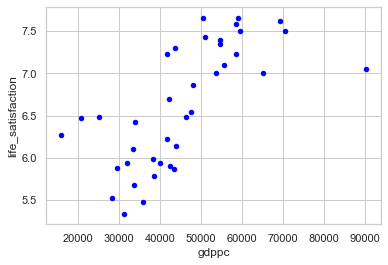

In [175]:
import seaborn as sns
sns.set_style('whitegrid')

data.plot(kind='scatter', x='gdppc', y='life_satisfaction', c='blue');

Model and predict

In [222]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

cyprus_gdp = [[22_587]]

lr = LinearRegression()
lr.fit(X, y)
print(f'Linear regression:  {lr.predict(cyprus_gdp)[0]:.1f}')

knn1 = KNeighborsRegressor(n_neighbors=1)
knn1.fit(X, y)
print(f'KNN, k=1:           {knn1.predict(cyprus_gdp)[0]:.1f}')

knn3 = KNeighborsRegressor(n_neighbors=3)
knn3.fit(X, y)
print(f'KNN, k=3:           {knn3.predict(cyprus_gdp)[0]:.1f}')

Linear regression:  5.9
KNN, k=1:           6.5
KNN, k=3:           6.2
